<a href="https://colab.research.google.com/github/RV05/Global-terrorism-EDA/blob/main/commit_two_Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

#<b>Problem Statement</b>
## <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd




In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Global Terrorism Data (1).csv",encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','success':'success'},inplace=True)

In [ ]:
df.shape

(181691, 135)

In [ ]:
df.describe()

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.0000

In [ ]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
100-(((df.loc[:,'approxdate'].count())/181691)*100)

94.91499303762983

about 94.9% of values are missing in this column. Before dropping these values, let's see if there is a specific pattern, meaning are these values missing in between a particular date, or missing for a particular location etc

This gives me an intuition that maybe other columns have just as many null 
values. I need to get a sense of the number of null values that are there in the dataset in a metric (likely %absoulte) that gives me an idea of what I am dealing with.


Before that let's drop the columns that won't contribute to our problem statement.


While trying to drop the columns, problem faced is I don't know the names of all the columns. so printing them first.

In [ ]:
print(df.columns.values)


['eventid' 'Year' 'Month' 'Day' 'approxdate' 'extended' 'resolution'
 'country' 'Country' 'region' 'Region' 'state' 'city' 'latitude'
 'longitude' 'specificity' 'vicinity' 'location' 'Summary' 'crit1' 'crit2'
 'crit3' 'doubtterr' 'alternative' 'alternative_txt' 'multiple' 'success'
 'suicide' 'attacktype1' 'AttackType' 'attacktype2' 'attacktype2_txt'
 'attacktype3' 'attacktype3_txt' 'targtype1' 'Target_type' 'targsubtype1'
 'targsubtype1_txt' 'corp1' 'Target' 'natlty1' 'natlty1_txt' 'targtype2'
 'targtype2_txt' 'targsubtype2' 'targsubtype2_txt' 'corp2' 'target2'
 'natlty2' 'natlty2_txt' 'targtype3' 'targtype3_txt' 'targsubtype3'
 'targsubtype3_txt' 'corp3' 'target3' 'natlty3' 'natlty3_txt' 'Group'
 'gsubname' 'gname2' 'gsubname2' 'gname3' 'gsubname3' 'Motive'
 'guncertain1' 'guncertain2' 'guncertain3' 'individual' 'nperps'
 'nperpcap' 'claimed' 'claimmode' 'claimmode_txt' 'claim2' 'claimmode2'
 'claimmode2_txt' 'claim3' 'claimmode3' 'claimmode3_txt' 'compclaim'
 'weaptype1' 'Weapon_typ

In [ ]:
100-(((df.loc[:,'approxdate'].count())/181691)*100)

94.91499303762983

% of values missing in each column

In [ ]:
dict_of_null_values={}
for columns in df.columns:
  dict_of_null_values[columns]=100-(((df.loc[:,columns].count())/181691)*100)
print(dict_of_null_values)

{'eventid': 0.0, 'Year': 0.0, 'Month': 0.0, 'Day': 0.0, 'approxdate': 94.91499303762983, 'extended': 0.0, 'resolution': 98.7781453126462, 'country': 0.0, 'Country': 0.0, 'region': 0.0, 'Region': 0.0, 'state': 0.23171208260177423, 'city': 0.2388670875277228, 'latitude': 2.507554034046805, 'longitude': 2.5081044190411177, 'specificity': 0.00330230996581804, 'vicinity': 0.0, 'location': 69.45638474112641, 'Summary': 36.39640928829716, 'crit1': 0.0, 'crit2': 0.0, 'crit3': 0.0, 'doubtterr': 0.0005503849942982697, 'alternative': 84.03278093026071, 'alternative_txt': 84.03278093026071, 'multiple': 0.0005503849942982697, 'success': 0.0, 'suicide': 0.0, 'attacktype1': 0.0, 'AttackType': 0.0, 'attacktype2': 96.5248691459676, 'attacktype2_txt': 96.5248691459676, 'attacktype3': 99.7644352224381, 'attacktype3_txt': 99.7644352224381, 'targtype1': 0.0, 'Target_type': 0.0, 'targsubtype1': 5.709143545910365, 'targsubtype1_txt': 5.709143545910365, 'corp1': 23.41888150761457, 'Target': 0.3500448563770391

In [ ]:
null_values_df=pd.DataFrame.from_dict(dict_of_null_values, orient='index')

In [ ]:
null_values_df.rename(columns={0:'% of null values'},inplace=True)

In [ ]:
null_values_df[null_values_df['% of null values']>80].describe()

,% of null values
count,68.000000
mean,96.560474
std,4.148616
min,84.032781
25%,94.018003
50%,98.941885
75%,99.668255
max,99.988992


We have 68 rows which have more than 80% values as null values

Let's drop the columns which have more than 80%
But before we do that let's see if we can reduce the error by dropping columns before a specific date

In [ ]:
null_values_df['1997_null_values']=df[df['Year']>1997].isnull().sum()*100/len(df[df['Year']>1997])

In [ ]:
null_values_df['2002_null_values']=df[df['Year']>2002].isnull().sum()*100/len(df[df['Year']>2002])

In [ ]:
null_values_df['2007_null_values']=df[df['Year']>2007].isnull().sum()*100/len(df[df['Year']>2007])

In [ ]:
null_values_df['2012_null_values']=df[df['Year']>2012].isnull().sum()*100/len(df[df['Year']>2012])

In [ ]:
null_values_df['2017_null_values']=df[df['Year']>2017].isnull().sum()*100/len(df[df['Year']>2017])

In [ ]:
null_values_df.head()

,% of null values,1997_null_values,2002_null_values,2007_null_values,2012_null_values,2017_null_values
eventid,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Year,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Month,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Day,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
approxdate,94.914993,91.935823,91.511395,90.683094,87.472036,NaN


In [ ]:
null_values_df.describe()

,% of null values,1997_null_values,2002_null_values,2007_null_values,2012_null_values,2017_null_values
count,135.000000,135.000000,135.000000,135.000000,135.000000,0.0
mean,56.481719,53.047855,53.059909,53.015004,53.167977,NaN
std,44.118525,45.705381,45.773586,45.898611,45.856431,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.220429,0.003941,0.003277,0.002076,0.000000,NaN
50%,84.032781,83.597527,83.430086,83.157742,81.297247,NaN
75%,98.941885,98.737126,98.752832,98.713424,98.530508,NaN
max,99.988992,99.995621,99.996255,99.995848,100.000000,NaN


if we look at the 25% row, it can be inferenced that droppping columns from 2012 section, and about 25%, will lead to least loss of features

In [ ]:
null_values_df.head()

,% of null values,1997_null_values,2002_null_values,2007_null_values,2012_null_values,2017_null_values
eventid,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Year,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Month,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Day,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
approxdate,94.914993,91.935823,91.511395,90.683094,87.472036,NaN


In [ ]:
df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [ ]:
clean_df=df[df['Year']>2012]

In [ ]:
clean_df.describe()

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,6.839100e+04,68391.000000,68391.000000,68391.000000,68391.000000,68391.00000,68391.000000,67964.000000,67964.000000,68391.000000,68391.000000,68391.000000,68391.000000,68391.000000,68390.000000,12791.000000,68390.000000,68391.000000,68391.000000,68391.000000,3135.00000,224.000000,68391.00000,63561.000000,67541.000000,5921.000000,5884.000000,5910.000000,515.000000,506.000000,514.000000,68391.000000,1370.000000,239.000000,68391.000000,68391.000000,68391.000000,68391.000000,12426.000000,1370.000000,399.000000,239.000000,76.000000,398.000000,68391.000000,62037.000000,6466.000000,5656.000000,1048.000000,962.000000,0.0,0.0,64820.000000,68380.000000,66951.000000,62349.000000,68368.000000,65832.000000,68391.000000,23962.000000,2.396200e+04,68391.000000,5762.000000,5762.000000,1670.000000,4092.000000,5762.000000,3.540000e+02,3.530000e+02,3.530000e+02,353.000000,5762.000000,5763.000000,68391.00000,68391.000000,68391.000000,68391.000000
mean,2.014984e+11,2014.918293,6.432001,15.788452,0.064482,124.35626,8.272697,26.308862,51.453788,1.487374,0.073782,0.990379,0.995789,0.834350,0.187030,1.265968,0.181591,0.845170,0.060198,3.441637,4.01563,5.732143,8.86681,47.649958,128.583986,10.890052,58.193916,127.111675,11.091262,58.903162,160.607004,0.043661,0.219708,0.121339,0.004138,-79.018862,-0.301765,0.181691,6.965878,0.291241,6.917293,0.317992,6.197368,0.753769,6.499759,11.639844,7.058305,10.892857,7.065840,12.125780,NaN,NaN,2.575316,0.006522,0.675957,3.011869,0.009434,0.154651,-1.216681,3.201444,1.575702e+04,0.052273,4.378341,-0.073933,-80.944760,-44.280547,-0.276467,2.191035e+06,1.872437e+04,8.459119e+05,27.767705,4.796946,-34.973104,-4.78503,-4.644427,0.062523,-4.354813
std,1.333243e+08,1.334403,3.396065,8.799554,0.245612,94.55374,2.317143,13.184468,32.897816,0.913553,0.261417,0.097615,0.064757,0.371769,0.389939,0.817191,0.385510,0.361745,0.237855,1.970074,2.40958,2.186309,6.58129,29.239238,94.017627,5.416557,24.571589,114.681641,5.285747,24.977782,193.241673,0.204341,0.414200,0.327206,0.064194,55.628525,6.131994,0.385592,2.066218,0.454500,2.382026,0.466674,2.303735,0.431357,2.204608,5.937189,2.559939,7.742028,2.255939,8.886835,NaN,NaN,12.162973,0.224330,4.723413,12.456144,0.651841,1.713222,3.601900,0.403887,1.017402e+06,0.607721,100.793510,2.922077,39.202104,95.585532,1.738233,1.592586e+07,3.512815e+05,1.464149e+07,532.328245,1.999498,68.966354,4.52305,4.682352,0.242105,4.718135
min,2.013010e+11,2013.000000,1.000000,1.000000,0.000000,4.00000,1.000000,-42.884049,-124.224996,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000,1.00000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.00000,-9.000000,0.000000,-9.000000
25%,2.014042e+11,2014.000000,4.000000,8.000000,0.000000,92.00000,6.000000,15.325443,37.762325,1.000000,0.000000,1.0

In [ ]:
clean_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
113299,201301010001,2013,1,1,NaN,0,NaN,153,Pakistan,6,South Asia,Khyber Pakhtunkhwa,Bannu,32.987347,70.602524,1.0,0,Inside the Miryan Police limits,01/01/2013: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Pakistani Police,Miryan Police Station,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
113300,201301010002,2013,1,1,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Saladin,Tuz Khormato,34.881348,44.625130,1.0,0,NaN,01/01/2013: An explosives-laden vehicle detona...,1,1,1,0.0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,75.0,Village/City/Town/Suburb,Not Applicable,Civilians,...,NaN,NaN,NaN,1.0,0.0,0.0,5.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Nearby homes and a fuel station were damaged i...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010002, 201301010003"
113301,201301010003,2013,1,1,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Saladin,Tuz Khormato,34.881348,44.625130,1.0,0,NaN,01/01/2013: At least two explosives detonated ...,1,1,1,0.0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Iraqi Police Service (IPS),Police First Responders,...,NaN,NaN,NaN,0.0,0.0,0.0,5.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Nearby homes and a fuel station were damaged i...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010002, 201301010003"
113302,201301010004,2013,1,1,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Kirkuk,Kirkuk,35.452110,44.375465,1.0,0,Southern Kirkuk,01/01/2013: An explosive device detonated targ...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Iraqi Police Service (IPS),Patrol,...,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A patrol vehicle was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this incident conflict ac...,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...","""Iraqi forces arrest al-Qaeda terrorists,"" IRI...","""Policeman killed, another wounded in Kirkuk,""...",START Primary Collection,-9,-9,0,-9,NaN
113303,201301010005,2013,1,1,NaN,0,NaN,153,Pakistan,6,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,0,The incident occurred in the Orangi Town neigh...,01/01/2013: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion

In [ ]:
dict_of_null_values_clean={}
for columns in clean_df.columns:
  dict_of_null_values_clean[columns]=100-(((clean_df.loc[:,columns].count())/68391)*100)
print(dict_of_null_values_clean)

{'eventid': 0.0, 'Year': 0.0, 'Month': 0.0, 'Day': 0.0, 'approxdate': 87.47203579418344, 'extended': 0.0, 'resolution': 100.0, 'country': 0.0, 'Country': 0.0, 'region': 0.0, 'Region': 0.0, 'state': 0.002924361392572905, 'city': 0.0, 'latitude': 0.6243511573160134, 'longitude': 0.6243511573160134, 'specificity': 0.0, 'vicinity': 0.0, 'location': 55.963503969820586, 'Summary': 0.0, 'crit1': 0.0, 'crit2': 0.0, 'crit3': 0.0, 'doubtterr': 0.001462180696293558, 'alternative': 81.29724671374889, 'alternative_txt': 81.29724671374889, 'multiple': 0.001462180696293558, 'success': 0.0, 'suicide': 0.0, 'attacktype1': 0.0, 'AttackType': 0.0, 'attacktype2': 95.41606351712944, 'attacktype2_txt': 95.41606351712944, 'attacktype3': 99.67247152403094, 'attacktype3_txt': 99.67247152403094, 'targtype1': 0.0, 'Target_type': 0.0, 'targsubtype1': 7.06233276308285, 'targsubtype1_txt': 7.06233276308285, 'corp1': 0.0, 'Target': 0.0, 'natlty1': 1.242853591846881, 'natlty1_txt': 1.242853591846881, 'targtype2': 91.

In [ ]:
null_df_clean=pd.DataFrame.from_dict(dict_of_null_values_clean, orient='index')

In [ ]:
null_df_clean[null_df_clean>80].describe()

,0
count,69.000000
mean,95.362705
std,5.502744
min,81.297247
25%,91.573453
50%,98.467635
75%,99.483850
max,100.000000


In [ ]:
null_values_df[null_values_df['% of null values']>80].describe()

,% of null values,1997_null_values,2002_null_values,2007_null_values,2012_null_values,2017_null_values
count,68.000000,68.000000,68.000000,68.000000,68.000000,0.0
mean,96.560474,95.491178,95.571767,95.656650,95.293348,NaN
std,4.148616,5.378218,5.318252,5.294041,5.857860,NaN
min,84.032781,76.152526,76.933016,78.033236,76.135749,NaN
25%,94.018003,91.818249,91.866023,91.875474,91.529222,NaN
50%,98.941885,98.737126,98.752832,98.713424,98.530508,NaN
75%,99.668255,99.511096,99.567892,99.562751,99.505052,NaN
max,99.988992,99.995621,99.996255,99.995848,100.000000,NaN


In [ ]:
null_df_clean[null_df_clean>80].describe()

,0
count,69.000000
mean,95.362705
std,5.502744
min,81.297247
25%,91.573453
50%,98.467635
75%,99.483850
max,100.000000


removing so many years' of values might create some bias,so I am not going to remove any values for now

In [ ]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


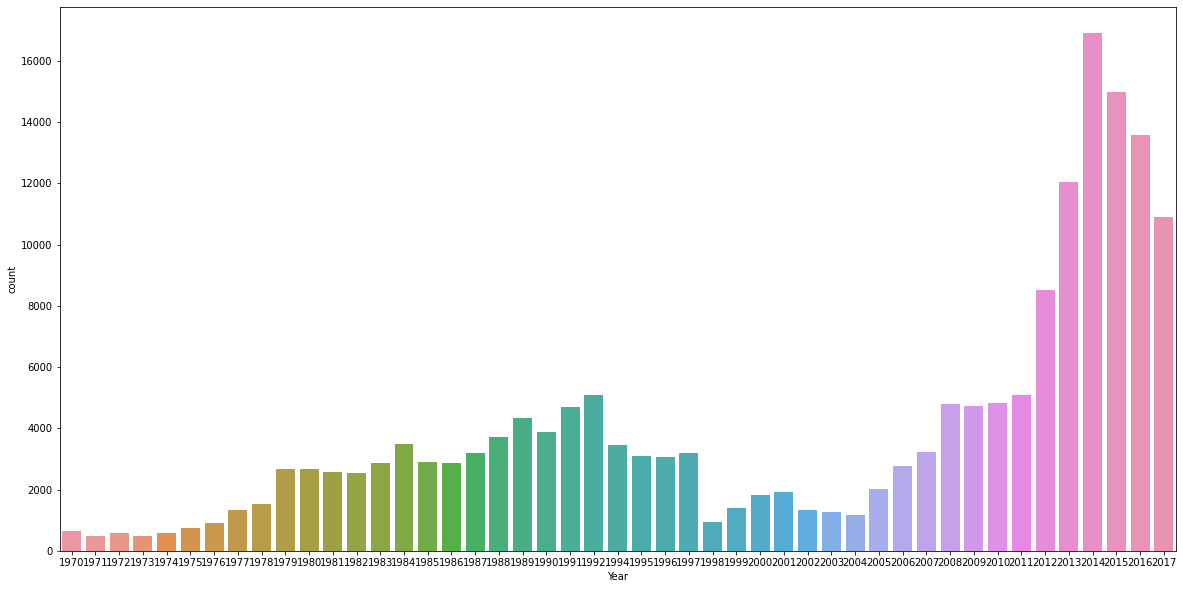

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,10))
sns.countplot(df['Year'])

In [ ]:
print(f"{df['Country'].value_counts().index[0]} has suffered the most number of attacks than any other country")
print(f"{df['city'].value_counts().index[1]}  has suffered the most number of attacks than any other city") 
print(f"{df['Region'].value_counts().index[0]} has suffered the most number of attacks than any other region")
print(f"max attacks were done in the year {df['Year'].value_counts().index[0]}")
print(f"max attacks were done in the month {df['Month'].value_counts().index[0]}")
print(f"grp which did the most attacks is {df['Group'].value_counts().index[1]}")
print(f"most common attack type is {df['AttackType'].value_counts().index[0]}")

Iraq has suffered the most number of attacks than any other country
Baghdad  has suffered the most number of attacks than any other city
Middle East & North Africa has suffered the most number of attacks than any other region
max attacks were done in the year 2014
max attacks were done in the month 5
grp which did the most attacks is Taliban
most common attack type is Bombing/Explosion


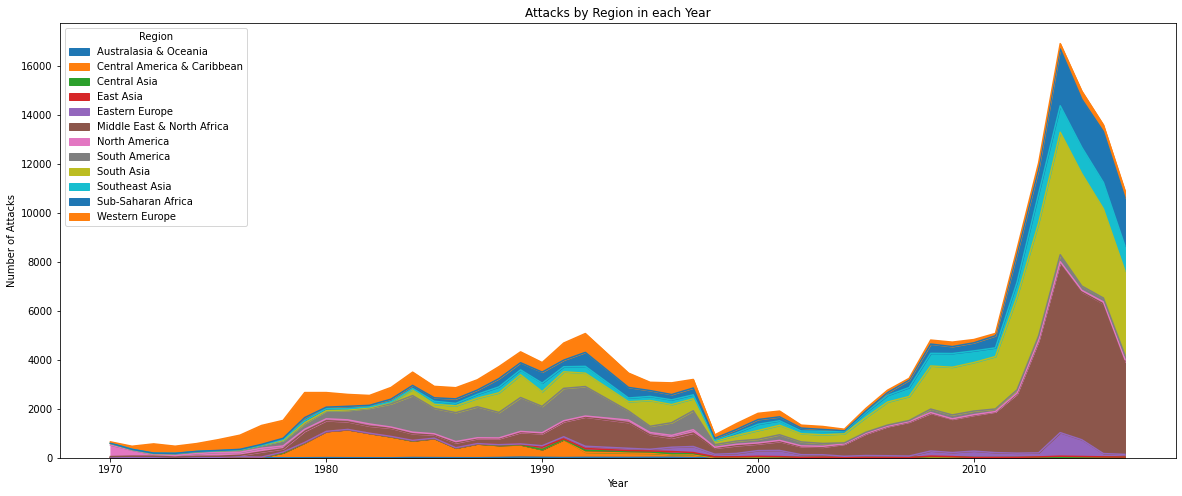

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(20,8))
plt.title('Attacks by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

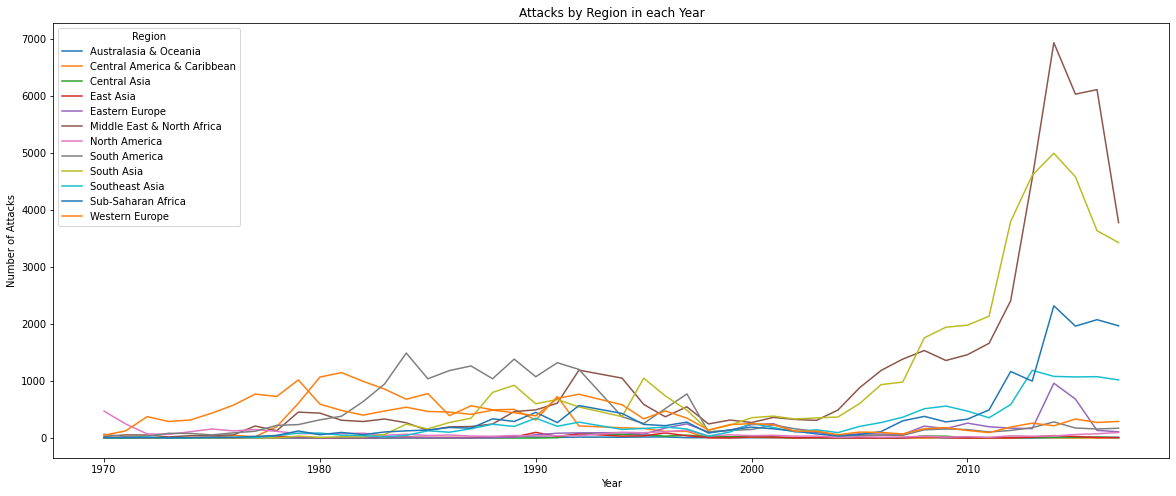

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='line',figsize=(20,8))
plt.title('Attacks by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

TO see which attack was the most disastrous in terms of casualties, i will be add a seperate column for casualties

In [ ]:

df['casualities'] = df['Killed'] + df['Wounded']

let's remove the NAN values before i plot them

I will just fill them 0

In [ ]:
df['casualities'].fillna(0,inplace=True)

In [ ]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0


i want to plot a graph which will show the casualities for each year, but i also want to show the year, so i am taking a heatmap

In [ ]:
df['casualities'].max()

9574.0

let's just take the top 100 most casulties by sorting it into descending order

In [ ]:
casualities_df = df.sort_values(by='casualities',ascending=False)[:100].fillna(0)

In [ ]:
casualities_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualities
73126,200109110004,2001,9,11,0,0,0,217,United States,1,North America,New York,New York City,40.697132,-73.931351,1.0,0,0,09/11/2001: This was one of four related attac...,1,1,1,0.0,0.0,0,1.0,1,1,4,Hijacking,2.0,Armed Assault,0.0,0,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Passengers and crew members on American Airlin...,...,0,The attackers reportedly gained control of the...,1384.0,1360.0,5.0,8190.0,0.0,0.0,1,1.0,Catastrophic (likely >= $1 billion),0.0,The crash resulted in the destruction of an Am...,1.0,88.0,86.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4.0,Hostage(s) killed (not during rescue attempt),0.0,This attack was one of four related incidents ...,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110004, 200109110005, 200109110006, 2001...",9574.0
73127,200109110005,2001,9,11,0,0,0,217,United States,1,North America,New York,New York City,40.697132,-73.931351,1.0,0,0,09/11/2001: This was one of four related attac...,1,1,1,0.0,0.0,0,1.0,1,1,4,Hijacking,2.0,Armed Assault,0.0,0,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Passengers and crew members on United Airlines...,...,0,The attackers reportedly gained control of the...,1383.0,1327.0,5.0,8191.0,0.0,0.0,1,1.0,Catastrophic (likely >= $1 billion),0.0,The crash resulted in the destruction of an Un...,1.0,59.0,54.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4.0,Hostage(s) killed (not during rescue attempt),0.0,This attack was one of four related incidents ...,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110005, 200109110004, 200109110006, 2001...",9574.0
58841,199503200014,1995,3,20,0,0,0,101,Japan,4,East Asia,Tokyo,Tokyo,35.689125,139.747742,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,8,Unarmed Assault,0.0,0,0.0,0,19,Transportation,102.0,Subway,gov't,Subway system,...,0,Sarin,13.0,0.0,0.0,5500.0,3.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,0,0,0,0,0,5513.0
68071,199808070002,1998,8,7,0,0,0,104,Kenya,11,Sub-Saharan Africa,Nairobi,Nairobi,-1.285180,36.821107,1.0,0,0,08/07/1998: Suicide attackers detonated a vehi...,1,1,1,0.0,0.0,0,1.0,1,1,3,Bombing/Explosion,0.0,0,0.0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Department of State,"United States Embassy in Nairobi, Kenya",...,0,0,224.0,12.0,1.0,4000.0,0.0,0.0,1,2.0,Major (likely >= $1 million but < $1 billion),0.0,The damage to both the Nairobi and the Dar es ...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,"Laura Myers, U.S. promises to hit back if any...","Kenya; New Twist in bomb Tragedy, Africa New...","Blast toll tops 200, Evening Herald (Plymout...",CETIS,0,1,1,1,"199808070002, 199808070003",4224.0
159773,201603080001,2016,3,9,0,0,0,95,Iraq,10,Middle East & North Africa,Kirkuk,Taza Khurmatu,35.303047,44.329933,1.0,0,0,03/09/2016: Assailants fired 60 rockets holdin...,1,1,1,0.0,0.0,0,0.0,1,0,3,Bombing/Explosion,0.0,0,0.0,0,14,Private Citizens & Property,75.0,Village/City/Town/Suburb,

Before making it into heatmap, i will have to convert into a spreadsheet format with an index, as y axis which I will have to set as years, then set country as x axis and finally the casualties will be plotted. To make into a spreadsheet format, pivot_table method is used

In [ ]:
heatmap_table=casualities_df.pivot_table(index='Country',columns='Year',values='casualities')
heatmap_table.head()

Year,1976,1978,1980,1981,1982,1983,1984,1985,1987,1992,1994,1995,1996,1997,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.0,365.5,408.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.0,NaN,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NaN won't be plotted,so let's fill them with 0

In [ ]:
heatmap_table.fillna(0,inplace=True)

In [ ]:
heatmap_table.head()

Year,1976,1978,1980,1981,1982,1983,1984,1985,1987,1992,1994,1995,1996,1997,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476.0,365.5,408.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,405.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


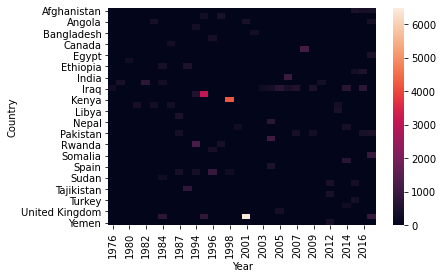

In [ ]:
sns.heatmap(heatmap_table)

Not visible enough,let's change the theme and add a figsize

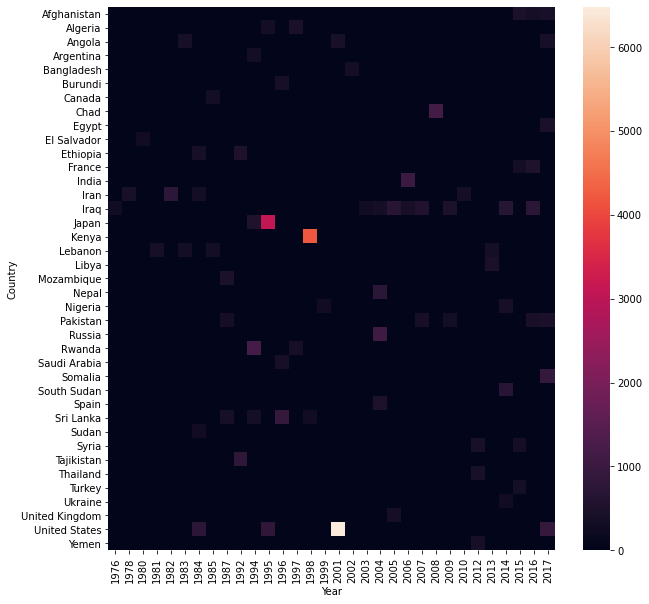

In [ ]:
fig = plt.subplots(figsize=(10,10)) 
sns.heatmap(heatmap_table)


Top 10 countries affected by the terrorist attacks

In [ ]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0


In [ ]:
df['Country'].value_counts()[:11].index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey', 'Somalia'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

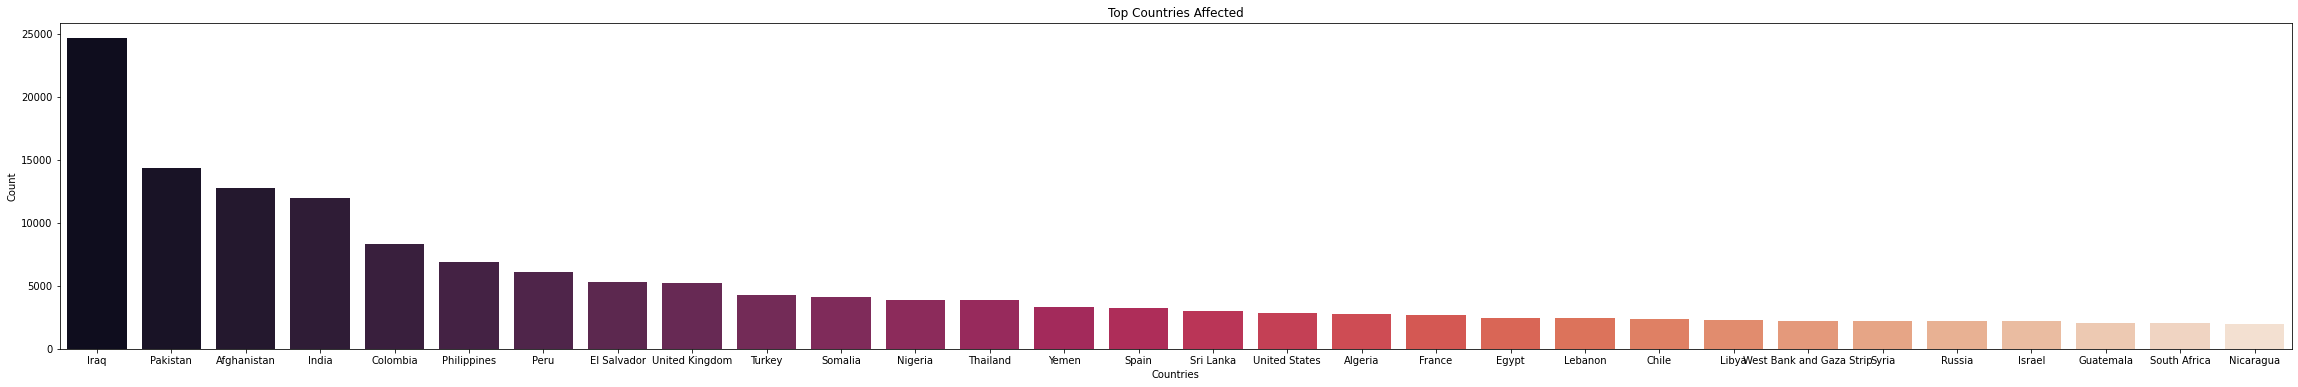

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(40,6))
sns.barplot(df['Country'].value_counts()[:30].index,df['Country'].value_counts()[:30],palette='rocket')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')


renaming so that all the labels can be easily understood, i will only plot the most important of all the labels,otherwise it will be cluttered.